In [11]:
import numpy as np

import matplotlib.pyplot as plt

In [12]:
with open("tempo_8.txt","rb") as f:
    contents=f.readlines()

In [13]:
contents=[line.decode().strip() for line in contents[int(3*len(contents)/4):-5]]

In [14]:
splitted = [lines.split(" ") for lines in contents if not lines.startswith("Land") and
            not lines.startswith("⚠") and
            not lines.startswith('---') and
            not lines.startswith('***') and
            not lines.startswith('MODE') and
            not lines.startswith('Saved') and
            not lines.startswith('cam_fps') and
            not lines.startswith('speed')]

In [15]:
times=[float(split[0]) for split in splitted]
actions=[split[2] for split in splitted]

In [16]:
actions=np.array(actions)
times=np.array(times)

In [17]:
times_dic={}
unique_actions=np.unique(actions)
for u_ac in unique_actions:
    mask=(actions==u_ac)
    # print(mask)
    # print(times[mask])
    # plt.plot(times[mask])
    times_dic[str(u_ac)]=times[mask]

In [18]:
tempos=[]
errs=[]
for a,b in times_dic.items():
    height=np.mean(b)
    tempos.append(height)
    errs.append(np.std(b))

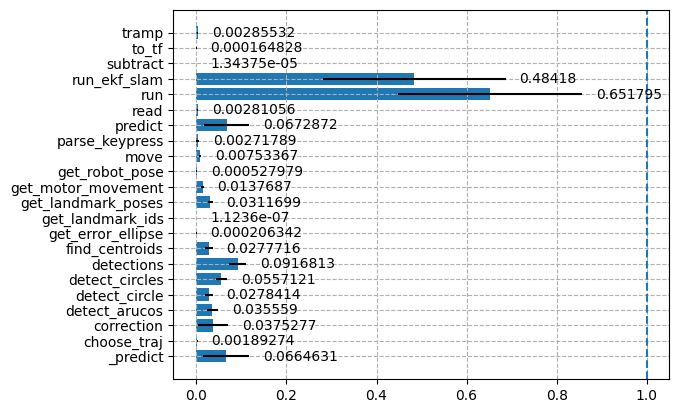

In [19]:
cc=plt.barh(list(times_dic.keys()), tempos, xerr=errs)
plt.bar_label(cc, padding=10)
plt.axvline(1, linestyle='dashed')
plt.grid(linestyle='dashed')
plt.show()
# plt.errorbar(list(times_dic.keys()), tempos, xerr=errs, fmt="o", color="r")